In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

In [3]:
sales = pd.read_excel('sales-pipeline.xlsx')
interactions=pd.read_excel('interactions.xlsx')

In [5]:
interactions.head()

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam..."
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you


In [266]:
sales.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256


In [262]:
sales.columns

Index(['Account', 'Opportunity_ID', 'Sales_Agent', 'SalesAgentEmailID',
       'ContactEmailID', 'Deal_Stage', 'Product', 'Close_Value',
       'Created Date', 'Close Date', 'DateDiff'],
      dtype='object')

In [63]:
sales['Deal_Stage'].value_counts()

Won            4238
Lost           2473
In Progress    2089
Name: Deal_Stage, dtype: int64

In [64]:
sales['Product'].value_counts()

GTX Basic         1866
MG Special        1651
GTXPro            1480
MG Advanced       1412
GTX Plus Basic    1383
GTX Plus Pro       968
GTK 500             40
Name: Product, dtype: int64

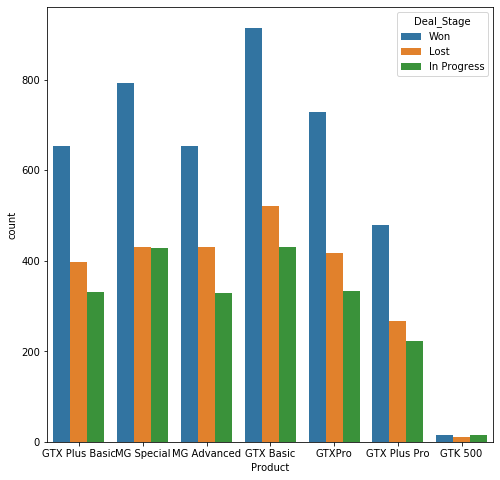

In [66]:
plt.figure(figsize=(8,8))
sns.countplot(sales['Product'], hue=sales['Deal_Stage'])
plt.show()

In [67]:
df = sales[sales['Deal_Stage'] != 'In Progress']
df.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256
5,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180,2016-01-07,2016-01-31,24


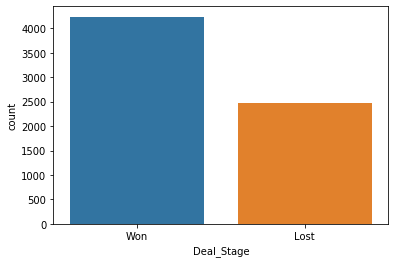

In [68]:
sns.countplot(df['Deal_Stage'])

In [69]:
df.isna().sum()

Account              0
Opportunity_ID       0
Sales_Agent          0
SalesAgentEmailID    0
ContactEmailID       0
Deal_Stage           0
Product              0
Close_Value          0
Created Date         0
Close Date           0
DateDiff             0
dtype: int64

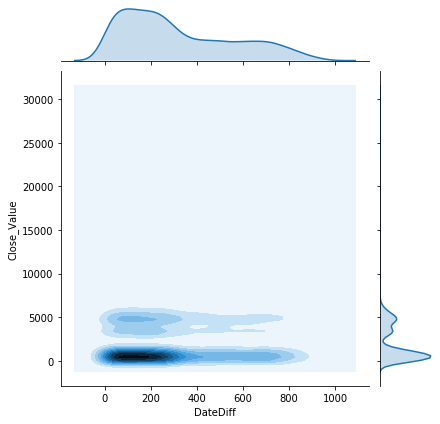

In [205]:
sns.jointplot(y='Close_Value', x='DateDiff', data=df, kind='kde')

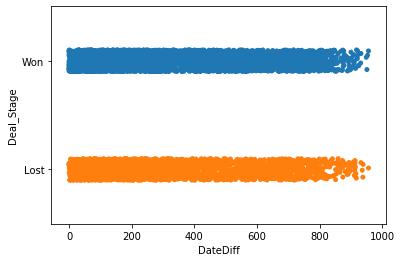

In [78]:
sns.stripplot(x='DateDiff', y='Deal_Stage', data=df)

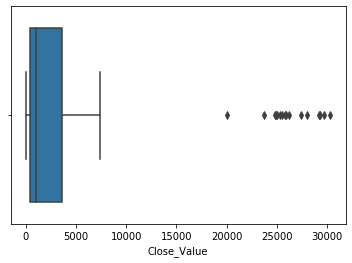

In [79]:
sns.boxplot(df['Close_Value'])

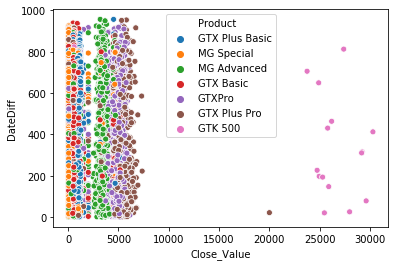

In [80]:
sns.scatterplot(x='Close_Value', y='DateDiff', hue='Product', data=df)

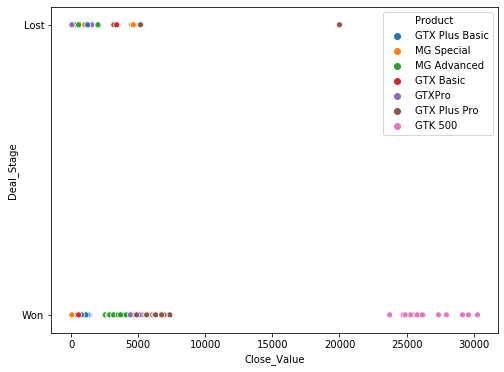

In [85]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Close_Value', y='Deal_Stage', hue='Product', data=df)
plt.legend()

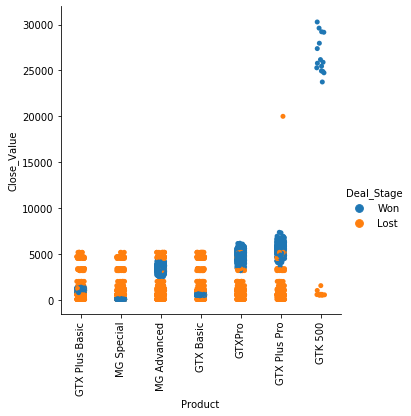

In [95]:
sns.catplot(x='Product', y='Close_Value', data=df, hue='Deal_Stage')
plt.xticks(rotation=90)
plt.show()

In [106]:
#We can see that we need to treat Product column as composed of Ordinal Values

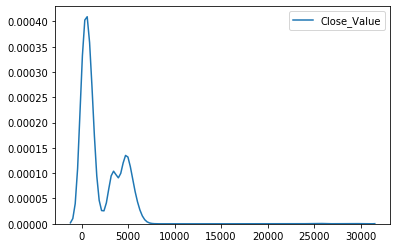

In [82]:
sns.kdeplot(df['Close_Value'])

In [109]:
df['Deal_Stage'] = df['Deal_Stage'].map({'Won':1,'Lost':0})

C:\Users\SIDDHARTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

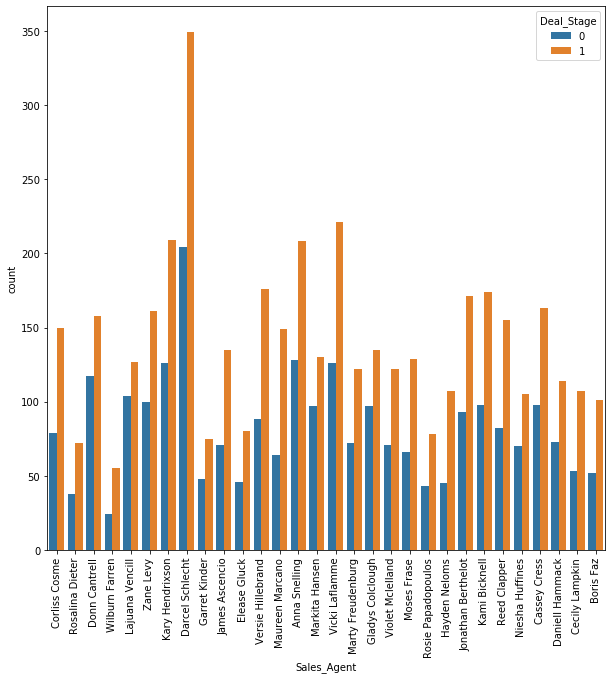

In [132]:
plt.figure(figsize=(10,10))
sns.countplot(df['Sales_Agent'], hue=df['Deal_Stage'])
plt.xticks(rotation=90)

In [134]:
df.groupby('Sales_Agent')['Deal_Stage'].mean().sort_values()

Sales_Agent
Lajuana Vencill       0.549784
Markita Hansen        0.572687
Donn Cantrell         0.574545
Gladys Colclough      0.581897
Niesha Huffines       0.600000
Daniell Hammack       0.609626
Garret Kinder         0.609756
Zane Levy             0.616858
Anna Snelling         0.619048
Kary Hendrixson       0.623881
Cassey Cress          0.624521
Marty Freudenburg     0.628866
Darcel Schlecht       0.631103
Violet Mclelland      0.632124
Elease Gluck          0.634921
Vicki Laflamme        0.636888
Kami Bicknell         0.639706
Rosie Papadopoulos    0.644628
Jonathan Berthelot    0.647727
Reed Clapper          0.654008
Rosalina Dieter       0.654545
Corliss Cosme         0.655022
James Ascencio        0.655340
Boris Faz             0.660131
Moses Frase           0.661538
Versie Hillebrand     0.666667
Cecily Lampkin        0.668750
Wilburn Farren        0.696203
Maureen Marcano       0.699531
Hayden Neloms         0.703947
Name: Deal_Stage, dtype: float64

In [135]:
ordered_agents = df.groupby('Sales_Agent')['Deal_Stage'].mean().sort_values().index

In [136]:
ordinal_agents = {k:i for i, k in enumerate(ordered_agents, 0)} 
ordinal_agents

{'Lajuana Vencill': 0,
 'Markita Hansen': 1,
 'Donn Cantrell': 2,
 'Gladys Colclough': 3,
 'Niesha Huffines': 4,
 'Daniell Hammack': 5,
 'Garret Kinder': 6,
 'Zane Levy': 7,
 'Anna Snelling': 8,
 'Kary Hendrixson': 9,
 'Cassey Cress': 10,
 'Marty Freudenburg': 11,
 'Darcel Schlecht': 12,
 'Violet Mclelland': 13,
 'Elease Gluck': 14,
 'Vicki Laflamme': 15,
 'Kami Bicknell': 16,
 'Rosie Papadopoulos': 17,
 'Jonathan Berthelot': 18,
 'Reed Clapper': 19,
 'Rosalina Dieter': 20,
 'Corliss Cosme': 21,
 'James Ascencio': 22,
 'Boris Faz': 23,
 'Moses Frase': 24,
 'Versie Hillebrand': 25,
 'Cecily Lampkin': 26,
 'Wilburn Farren': 27,
 'Maureen Marcano': 28,
 'Hayden Neloms': 29}

In [139]:
df['Ordered_Agent'] = df.Sales_Agent.map(ordinal_agents)

C:\Users\SIDDHARTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [81]:
#Data Preprocessing

In [86]:
#Observation 1 - All values for the 'Close_Value' columns are within the IQ range, but from the boxplot we see that some values are 
#really far from the normal values.
#But by doing various viz's we see that those value are actually important since they all belong to a single category for the 
#Product columns and also all those values have been converted into a deal(Closed Deal - YES).

In [113]:
# I shall be using a Target guided ordinal encoding to encode the values for the 'Product' column.

In [240]:
ordered_labels = df.groupby('Product')['Deal_Stage'].mean().sort_values().index

In [241]:
# and now we create a dictionary that maps each label to the number

ordinal_label = {k:i for i, k in enumerate(ordered_labels, 0)} 
ordinal_label

{'GTK 500': 0,
 'MG Advanced': 1,
 'GTX Plus Basic': 2,
 'GTXPro': 3,
 'GTX Basic': 4,
 'GTX Plus Pro': 5,
 'MG Special': 6}

In [242]:
df['Ordered_Product'] = df.Product.map(ordinal_label)

C:\Users\SIDDHARTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [140]:
df.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Ordered_Product,Ordered_Agent
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,1,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,2,21
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,1,MG Special,45,2016-01-04,2016-11-02,303,6,20
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,0,MG Special,1054,2016-01-06,2016-12-07,336,6,2
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,0,MG Advanced,517,2016-01-06,2016-09-18,256,1,27
5,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,1,MG Advanced,3180,2016-01-07,2016-01-31,24,1,0


In [267]:
df.to_csv('sales.csv')

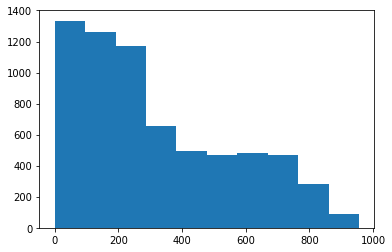

In [120]:
plt.hist(df['DateDiff'])
plt.show()

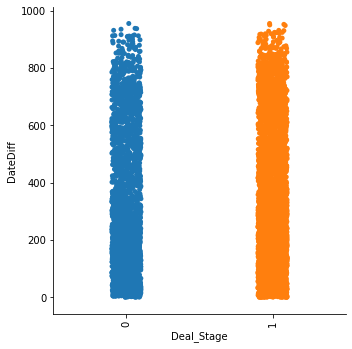

In [126]:
sns.catplot(y='DateDiff', x='Deal_Stage', data=df)
plt.xticks(rotation=90)
plt.show()

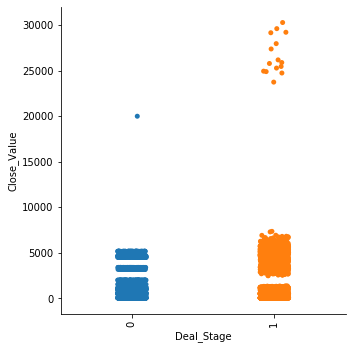

In [127]:
sns.catplot(y='Close_Value', x='Deal_Stage', data=df)
plt.xticks(rotation=90)
plt.show()

In [144]:
df.columns

Index(['Account', 'Opportunity_ID', 'Sales_Agent', 'SalesAgentEmailID',
       'ContactEmailID', 'Deal_Stage', 'Product', 'Close_Value',
       'Created Date', 'Close Date', 'DateDiff', 'Ordered_Product',
       'Ordered_Agent'],
      dtype='object')

In [141]:
# At first we shall build a simple model using the given features:
# 1. Close_value, 2. DateDiff, 3. Ordered_Product, 4. Ordered_Agent

In [149]:
X = df[['Close_Value','DateDiff', 'Ordered_Product','Ordered_Agent']]
y = df['Deal_Stage']

In [150]:
X

,Close_Value,DateDiff,Ordered_Product,Ordered_Agent
0,1255,141,2,21
1,45,303,6,20
2,1054,336,6,2
4,517,256,1,27
5,3180,24,1,0
...,...,...,...,...
8293,555,241,4,19
8296,5169,191,5,12
8297,4631,642,6,15
8298,4880,37,5,12


In [152]:
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [151]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0, stratify=y)
X_train.shape, X_test.shape

((4697, 4), (2014, 4))

In [153]:
scaler = RobustScaler() # call the object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then scale it
X_test_scaled = scaler.transform(X_test) # scale the test set

In [154]:
#WE shall be using this scaled version of the dataset for algorithms which require us to use a distance metric, 

## Algorithm 1 - Logistic Regression

In [156]:
from sklearn.linear_model import LogisticRegression

In [181]:
# example of grid searching key hyperparametres for logistic regression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=3, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)

In [182]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.683631 using {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}


In [188]:
best_model1 = LogisticRegression(C=1, solver='newton-cg', penalty = 'l2')
best_model1.fit(X_train_scaled, y_train)
y_pred = best_model1.predict(X_test_scaled)

In [189]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve

print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))

[[ 144  598]
 [  26 1246]]
Accuracy of our model is:  0.6901688182720953


In [190]:
from sklearn.metrics import classification_report, cohen_kappa_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.19      0.32       742
           1       0.68      0.98      0.80      1272

    accuracy                           0.69      2014
   macro avg       0.76      0.59      0.56      2014
weighted avg       0.74      0.69      0.62      2014



In [191]:
print(cohen_kappa_score(y_test, y_pred))

0.2068504147712068


Feature: 0, Score: 0.89830
Feature: 1, Score: -0.06748
Feature: 2, Score: 0.26383
Feature: 3, Score: 0.21140


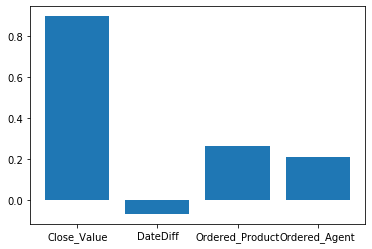

In [193]:
# get importance
importance = best_model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in X_train.columns], importance)
plt.show()

In [167]:
# 2. Random Forests

In [168]:
from sklearn.ensemble import RandomForestClassifier

In [175]:
rf1 = RandomForestClassifier()

n_estimators = [200, 300, 500, 400, 100]
max_depth = [4,6,5, 7,8]
min_samples_split = [6,8,9,7]

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split)

gridF = GridSearchCV(rf1, hyperF, cv = 3, verbose = 1, scoring='accuracy',
                      n_jobs = -1)
bestF = gridF.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.2min finished


In [176]:
# summarize results
print("Best: %f using %s" % (bestF.best_score_, bestF.best_params_))

Best: 0.914414 using {'max_depth': 8, 'min_samples_split': 7, 'n_estimators': 300}


In [177]:
rf_best = RandomForestClassifier(max_depth= 8, min_samples_split= 7, n_estimators= 300, min_samples_leaf=3, max_features='sqrt')

In [178]:
rf_best.fit(X_train_scaled, y_train)
y_pred = rf_best.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 575  167]
 [   4 1268]]
Accuracy of our model is:  0.9150943396226415
              precision    recall  f1-score   support

           0       0.99      0.77      0.87       742
           1       0.88      1.00      0.94      1272

    accuracy                           0.92      2014
   macro avg       0.94      0.89      0.90      2014
weighted avg       0.92      0.92      0.91      2014



In [179]:
print(cohen_kappa_score(y_test, y_pred))

0.8088036250220679


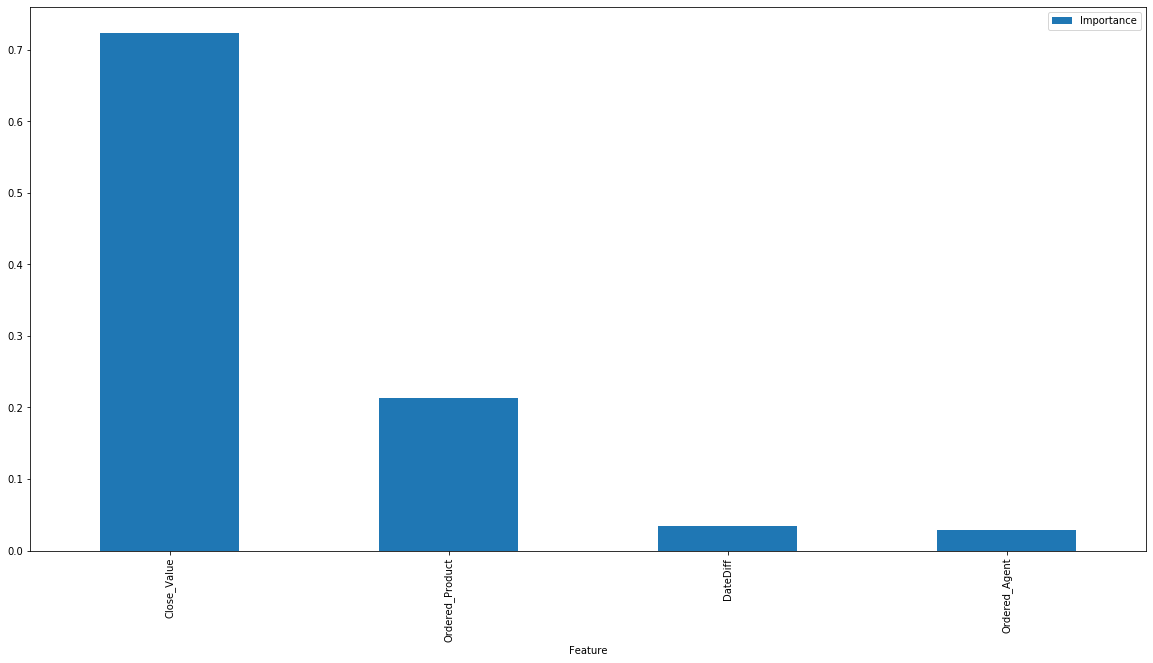

In [180]:
features = pd.DataFrame()
features['Feature'] = X_train.columns
features['Importance'] = rf_best.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

features.plot(kind='bar', figsize=(20, 10))

## Support Vector Machines

In [196]:
from sklearn.svm import SVC 

from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [ 5, 10, 100, 50, 75], 
            'gamma': [ 0.1, 0.01, 0.001], 
            'kernel': ['rbf', 'poly', 'sigmoid']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3, cv=3, scoring='accuracy') 

# fitting the model for grid search 
grid.fit(X_train_scaled, y_train) 

Fitting 3 folds for each of 45 candidates, totalling 135 fits
[CV] C=5, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=5, gamma=0.1, kernel=rbf, score=0.695, total=   0.5s
[CV] C=5, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] .......... C=5, gamma=0.1, kernel=rbf, score=0.729, total=   0.4s
[CV] C=5, gamma=0.1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s


[CV] .......... C=5, gamma=0.1, kernel=rbf, score=0.733, total=   0.4s
[CV] C=5, gamma=0.1, kernel=poly .....................................
[CV] ......... C=5, gamma=0.1, kernel=poly, score=0.632, total=   0.3s
[CV] C=5, gamma=0.1, kernel=poly .....................................
[CV] ......... C=5, gamma=0.1, kernel=poly, score=0.632, total=   0.3s
[CV] C=5, gamma=0.1, kernel=poly .....................................
[CV] ......... C=5, gamma=0.1, kernel=poly, score=0.632, total=   0.2s
[CV] C=5, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=5, gamma=0.1, kernel=sigmoid, score=0.693, total=   0.6s
[CV] C=5, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=5, gamma=0.1, kernel=sigmoid, score=0.670, total=   0.5s
[CV] C=5, gamma=0.1, kernel=sigmoid ..................................
[CV] ...... C=5, gamma=0.1, kernel=sigmoid, score=0.706, total=   0.5s
[CV] C=5, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] .... C=100, gamma=0.1, kernel=sigmoid, score=0.594, total=   0.3s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=100, gamma=0.1, kernel=sigmoid, score=0.577, total=   0.4s
[CV] C=100, gamma=0.1, kernel=sigmoid ................................
[CV] .... C=100, gamma=0.1, kernel=sigmoid, score=0.597, total=   0.3s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.672, total=   0.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.695, total=   0.6s
[CV] C=100, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=100, gamma=0.01, kernel=rbf, score=0.692, total=   0.6s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] ...... C=100, gamma=0.01, kernel=poly, score=0.632, total=   0.2s
[CV] C=100, gamma=0.01, kernel=poly ..................................
[CV] .

[CV] ........ C=75, gamma=0.01, kernel=rbf, score=0.696, total=   0.5s
[CV] C=75, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=75, gamma=0.01, kernel=rbf, score=0.696, total=   0.5s
[CV] C=75, gamma=0.01, kernel=poly ...................................
[CV] ....... C=75, gamma=0.01, kernel=poly, score=0.632, total=   0.3s
[CV] C=75, gamma=0.01, kernel=poly ...................................
[CV] ....... C=75, gamma=0.01, kernel=poly, score=0.632, total=   0.3s
[CV] C=75, gamma=0.01, kernel=poly ...................................
[CV] ....... C=75, gamma=0.01, kernel=poly, score=0.631, total=   0.3s
[CV] C=75, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=75, gamma=0.01, kernel=sigmoid, score=0.632, total=   1.2s
[CV] C=75, gamma=0.01, kernel=sigmoid ................................
[CV] .... C=75, gamma=0.01, kernel=sigmoid, score=0.632, total=   1.3s
[CV] C=75, gamma=0.01, kernel=sigmoid ................................
[CV] .

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.2min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [5, 10, 100, 50, 75], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [197]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [198]:
svc = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
svc.fit(X_train_scaled, y_train)
y_pred = svc.predict(X_test_scaled)

In [199]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 306  436]
 [  17 1255]]
Accuracy of our model is:  0.7750744786494538
              precision    recall  f1-score   support

           0       0.95      0.41      0.57       742
           1       0.74      0.99      0.85      1272

    accuracy                           0.78      2014
   macro avg       0.84      0.70      0.71      2014
weighted avg       0.82      0.78      0.75      2014



In [202]:
print(cohen_kappa_score(y_test, y_pred))

0.45223700120918986


## Gradient Boosting Classifier

In [207]:
from sklearn.ensemble import GradientBoostingClassifier

In [210]:
parameters = {'n_estimators': [5,10],
              'loss':['huber', 'deviance'],
              'criterion': ['mse', "friedman_mse"],
              'max_depth': [5,10,3], 
              "max_features":["log2","sqrt"],
              'min_samples_split': [2,5,3],
              'min_samples_leaf': [1,3,5]
             }


clf = GridSearchCV(GradientBoostingClassifier(), parameters, cv=3, n_jobs=-1, verbose=1)

In [211]:
clf.fit(X_train_scaled, y_train) 
print(clf.score(X_train_scaled, y_train))
print(clf.best_params_)

0.9420906961890568
{'criterion': 'friedman_mse', 'loss': 'deviance', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 10}


In [220]:
gbmclf = GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100)
gbmclf.fit(X_train_scaled, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [221]:
y_pred = gbmclf.predict(X_test_scaled)

In [222]:
print(confusion_matrix(y_test, y_pred))
print('Accuracy of our model is: ', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 612  130]
 [   6 1266]]
Accuracy of our model is:  0.9324726911618669
              precision    recall  f1-score   support

           0       0.99      0.82      0.90       742
           1       0.91      1.00      0.95      1272

    accuracy                           0.93      2014
   macro avg       0.95      0.91      0.92      2014
weighted avg       0.94      0.93      0.93      2014



In [223]:
print(cohen_kappa_score(y_test, y_pred))

0.8496625552711193


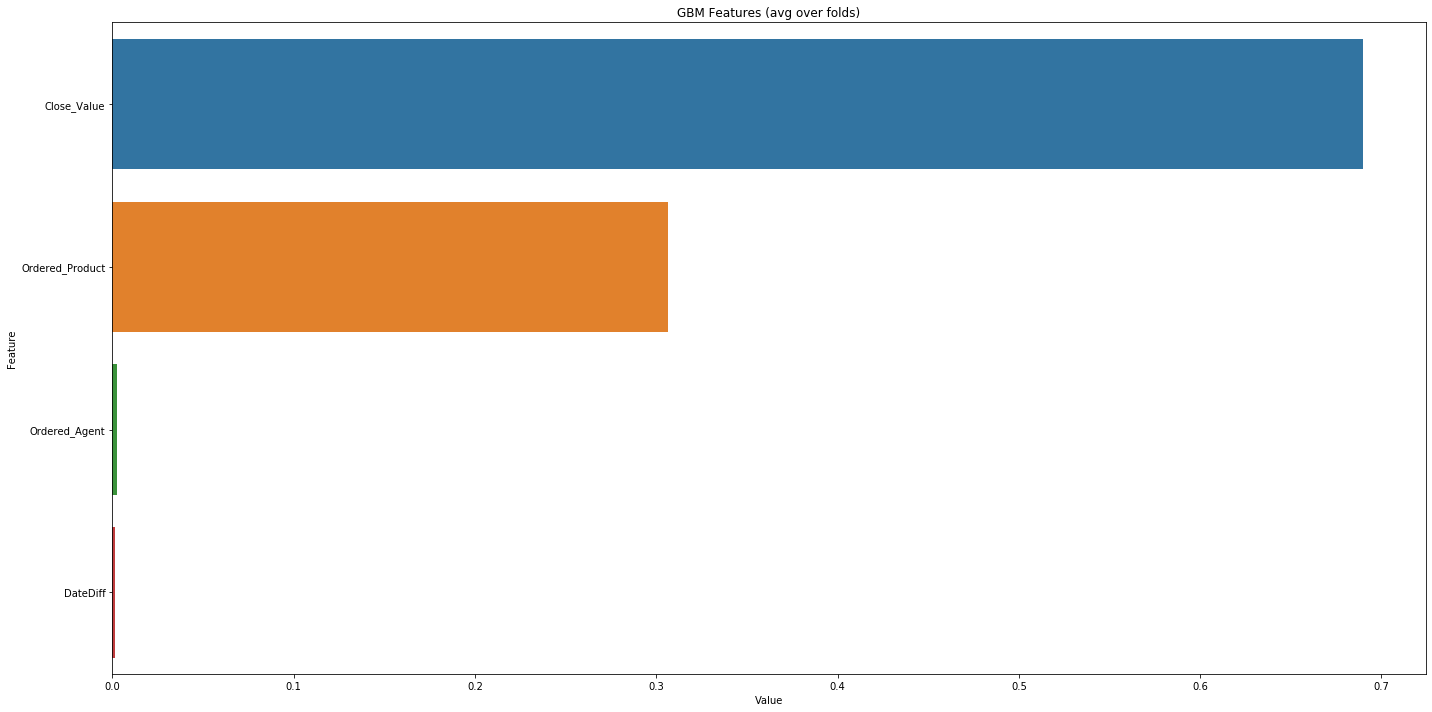

In [225]:
# sorted(zip(clf.feature_importances_, X.columns), reverse=True)
feature_imp = pd.DataFrame(sorted(zip(gbmclf.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('GBM Features (avg over folds)')
plt.tight_layout()
plt.show()

In [229]:
## Making predictions for unseen data. I will be using the GBM and the Random Forest model for making predictions

In [235]:
test = sales[sales['Deal_Stage'] == 'In Progress']
test.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249
15,Umbrella Corporation,3ECHUPQY,Daniell Hammack,daniell@piedpiper.com,orpha@umbrellacorporation.com,In Progress,GTX Plus Basic,561,2016-01-17,2016-10-03,260
35,Ontomedia,1ZDDZD8B,Markita Hansen,markita@piedpiper.com,nedra@ontomedia.com,In Progress,MG Special,50,2016-02-13,2016-11-01,262
39,Hottechi,J53D8EOL,Kary Hendrixson,kary@piedpiper.com,juliette@hottechi.com,In Progress,GTX Plus Basic,601,2016-02-20,2016-05-30,100
42,Silis,NKPH3EFG,Cassey Cress,cassey@piedpiper.com,zulema@silis.com,In Progress,MG Advanced,560,2016-02-22,2016-09-16,207


In [244]:
test.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Ordered_Product,Ordered_Agent
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249,1,22
15,Umbrella Corporation,3ECHUPQY,Daniell Hammack,daniell@piedpiper.com,orpha@umbrellacorporation.com,In Progress,GTX Plus Basic,561,2016-01-17,2016-10-03,260,2,5
35,Ontomedia,1ZDDZD8B,Markita Hansen,markita@piedpiper.com,nedra@ontomedia.com,In Progress,MG Special,50,2016-02-13,2016-11-01,262,6,1
39,Hottechi,J53D8EOL,Kary Hendrixson,kary@piedpiper.com,juliette@hottechi.com,In Progress,GTX Plus Basic,601,2016-02-20,2016-05-30,100,2,9
42,Silis,NKPH3EFG,Cassey Cress,cassey@piedpiper.com,zulema@silis.com,In Progress,MG Advanced,560,2016-02-22,2016-09-16,207,1,10


In [238]:
test['Ordered_Agent'] = test.Sales_Agent.map(ordinal_agents)

C:\Users\SIDDHARTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [243]:
test['Ordered_Product'] = test.Product.map(ordinal_label)

C:\Users\SIDDHARTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [245]:
X = test[['Close_Value','DateDiff', 'Ordered_Product','Ordered_Agent']]

In [246]:
X.head()

,Close_Value,DateDiff,Ordered_Product,Ordered_Agent
3,1054,249,1,22
15,561,260,2,5
35,50,262,6,1
39,601,100,2,9
42,560,207,1,10


In [247]:
scaler = RobustScaler() # call the object
X_scaled = scaler.fit_transform(X) # fit the scaler to the train set, and then scale it

In [248]:
gbm_predictions = gbmclf.predict(X_scaled)

In [249]:
rf_predictions = rf_best.predict(X_scaled)

In [253]:
test['Predictions_GBM'] = gbm_predictions
test['Predictions_RF'] = rf_predictions

C:\Users\SIDDHARTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\SIDDHARTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [259]:
test['Predictions_RF'] = test['Predictions_RF'].map({1:'Won',0:'Lost'})

C:\Users\SIDDHARTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [260]:
test['Predictions_GBM'] = test['Predictions_GBM'].map({1:'Won',0:'Lost'})

C:\Users\SIDDHARTH\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [261]:
test.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Ordered_Product,Ordered_Agent,Predictions_GBM,Predictions_RF
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249,1,22,Won,Won
15,Umbrella Corporation,3ECHUPQY,Daniell Hammack,daniell@piedpiper.com,orpha@umbrellacorporation.com,In Progress,GTX Plus Basic,561,2016-01-17,2016-10-03,260,2,5,Won,Won
35,Ontomedia,1ZDDZD8B,Markita Hansen,markita@piedpiper.com,nedra@ontomedia.com,In Progress,MG Special,50,2016-02-13,2016-11-01,262,6,1,Won,Won
39,Hottechi,J53D8EOL,Kary Hendrixson,kary@piedpiper.com,juliette@hottechi.com,In Progress,GTX Plus Basic,601,2016-02-20,2016-05-30,100,2,9,Won,Won
42,Silis,NKPH3EFG,Cassey Cress,cassey@piedpiper.com,zulema@silis.com,In Progress,MG Advanced,560,2016-02-22,2016-09-16,207,1,10,Won,Won


In [257]:
test['Predictions_RF'].value_counts()

0    1215
1     874
Name: Predictions_RF, dtype: int64

In [265]:
test.to_csv('predictions.csv')